#**INDIVIDUAL ID** **:** PTID-CDS-APR-24-1892

#**BATCH ID** **:** 20-NOV-CDS-WDM09-BAN

#**PROJECT** **:** PRCP-1007-JohnsHopkins covid19

# **PROBLEM STATEMENT** **:**

**Task 1:-** Prepare a complete data analysis report on the given data.

**Task 2:-** Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

**Task3:-** Make suggestions to the government health department of the country/region for preparation based on your predictions.

##**DOMAIN EXPERTISE**

##**Domain: Healthcare**
####**3 Dataset for Analysis**
**1.time_series_covid19_confirmed_global**
Contains the count of confirmed patients on each day along with their country,states etc.

**2.time_series_covid19_deaths_global**
Contains the count of death cases on each day along with their country,States etc.

**3.time_series_covid19_recovered_global**
Contains the count of recovered patients on each day along with their country,states,etc.
This is a daily updating version of COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU). The data updates every day at 6am UTC, which updates just after the raw JHU data typically updates.

**Attributes:**
**1.Province/State**
This attribute contains Provinces or states of different countries.

**2.Country/Region**
Contains different countries affected by covid 19.

**3.Lat**
Latitude of the countries.

**4.Long**
Longitude of the countries.

**5. 1/22/20 to 9/21/20**
These are the daily confirmed,death.recovered cases from 1/22/20 to 9/21/20.

###**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import plotly.express as px

In [ ]:
confirmed=pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
deaths=pd.read_csv('/content/time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('/content/time_series_covid19_recovered_global.csv')

###**BASIC CHECKS**

In [ ]:
confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...    38641    38716    38772   
1        0        0        0        0  ...    11185    11353    11520   
2        0        0        0        0  ...    48007    48254    48496   
3        0        0        0        0  ...     1344     1344     1438   
4        0        0        0        0  ...     3335     3388     3439   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0    38815    38855    38872    38883    38919    39044    39074  
1    11672    11816    11948    12073    12226    12385    12535  
2    48734    48966    49194    49413    49623    49826    50023  
3     1438     1483     1483     1564     1564     1564     1681  
4     3569     3675     3789     3848     3901     3991     4117  

[5 rows x 248 columns]

In [ ]:
deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...     1420     1420     1425   
1        0        0        0        0  ...      330      334      338   
2        0        0        0        0  ...     1605     1612     1620   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...      132      134      136   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0     1426     1436     1436     1437     1437     1441     1444  
1      340      343      347      353      358      362      364  
2     1632     1645     1654     1659     1665     1672     1679  
3       53       53       53       53       53       53       53  
4      139      143      144      147      147      152      154  

[5 rows x 248 columns]

In [ ]:
recovered.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...    31234    31638    32073   
1        0        0        0        0  ...     6494     6569     6615   
2        0        0        0        0  ...    33875    34037    34204   
3        0        0        0        0  ...      943      943      945   
4        0        0        0        0  ...     1289     1301     1324   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0    32098    32503    32505    32576    32576    32576    32576  
1     6668     6733     6788     6831     6888     6940     6995  
2    34385    34517    34675    34818    34923    35047    35180  
3      945     1054     1054     1164     1164     1164     1199  
4     1332     1401     1405     1443     1445     1445     1449  

[5 rows x 248 columns]

In [ ]:
confirmed.shape,deaths.shape,recovered.shape

((266, 248), (266, 248), (253, 248))

 Both confirmed and death dataset have 265 rows and 248 columns but recovered dataset contains 253 rows and 248 columns

In [ ]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [ ]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [ ]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB


In [ ]:
recovered.describe().T

count          mean            std       min         25%  \
Lat      253.0     19.835137      24.504550  -51.7963    6.428055   
Long     253.0     27.997068      67.358197 -106.3468   -8.224500   
1/22/20  253.0      0.110672       1.760345    0.0000    0.000000   
1/23/20  253.0      0.118577       1.764332    0.0000    0.000000   
1/24/20  253.0      0.142292       1.954723    0.0000    0.000000   
...        ...           ...            ...       ...         ...   
9/17/20  253.0  81135.118577  399323.266276    0.0000  374.000000   
9/18/20  253.0  82130.395257  404589.299248    0.0000  374.000000   
9/19/20  253.0  83070.359684  410616.500849    0.0000  374.000000   
9/20/20  253.0  84003.221344  415977.222972    0.0000  380.000000   
9/21/20  253.0  84563.608696  417894.380363    0.0000  380.000000   

                 50%         75%           max  
Lat        21.521757     39.3054  7.170690e+01  
Long       23.881300     85.2401  1.780650e+02  
1/22/20     0.000000      0.0000  2.800000e+01  
1/23/20     0.000000      0.0000  2.800000e+01  
1/24/20     0.000000      0.0000  3.100000e+01  
...              ...         ...           ...  
9/17/20  2112.000000  22662.0000  4.112551e+06  
9/18/20  2128.000000  23160.0000  4.208431e+06  
9/19/20  2197.000000  23364.0000  4.303043e+06  
9/20/20  2239.000000  23364.0000  4.396399e+06  
9/21/20  2369.000000  23364.0000  4.396399e+06  

[246 rows x 8 columns]

In [ ]:
confirmed.describe().T

count           mean            std       min         25%  \
Lat      266.0      21.076624      24.904600  -51.7963    6.677575   
Long     266.0      22.829441      70.191330 -135.0000  -15.277675   
1/22/20  266.0       2.086466      27.279200    0.0000    0.000000   
1/23/20  266.0       2.458647      27.377862    0.0000    0.000000   
1/24/20  266.0       3.537594      34.083035    0.0000    0.000000   
...        ...            ...            ...       ...         ...   
9/17/20  266.0  113441.026316  595308.127676    0.0000  470.750000   
9/18/20  266.0  114659.902256  601734.945480    0.0000  470.750000   
9/19/20  266.0  115717.124060  607673.701689    0.0000  470.750000   
9/20/20  266.0  116623.954887  612659.914215    0.0000  470.750000   
9/21/20  266.0  117465.402256  615488.633827    0.0000  471.000000   

                 50%           75%           max  
Lat        22.820850     41.143200  7.170690e+01  
Long       20.921188     77.913685  1.780650e+02  
1/22/20     0.000000      0.000000  4.440000e+02  
1/23/20     0.000000      0.000000  4.440000e+02  
1/24/20     0.000000      0.000000  5.490000e+02  
...              ...           ...           ...  
9/17/20  3522.500000  36395.250000  6.674411e+06  
9/18/20  3608.000000  36708.250000  6.723933e+06  
9/19/20  3714.500000  37312.750000  6.768119e+06  
9/20/20  3772.000000  37816.500000  6.804814e+06  
9/21/20  3823.500000  38263.250000  6.856884e+06  

[246 rows x 8 columns]

In [ ]:
deaths.describe().T

count         mean           std       min        25%        50%  \
Lat      266.0    21.076624     24.904600  -51.7963   6.677575  22.820850   
Long     266.0    22.829441     70.191330 -135.0000 -15.277675  20.921188   
1/22/20  266.0     0.063910      1.042337    0.0000   0.000000   0.000000   
1/23/20  266.0     0.067669      1.043908    0.0000   0.000000   0.000000   
1/24/20  266.0     0.097744      1.473615    0.0000   0.000000   0.000000   
...        ...          ...           ...       ...        ...        ...   
9/17/20  266.0  3556.620301  16831.543769    0.0000   5.250000  60.500000   
9/18/20  266.0  3578.071429  16934.234212    0.0000   5.250000  61.500000   
9/19/20  266.0  3597.740602  17019.787840    0.0000   5.250000  62.500000   
9/20/20  266.0  3611.635338  17068.307397    0.0000   5.250000  64.000000   
9/21/20  266.0  3622.906015  17102.864472    0.0000   5.250000  64.500000   

                75%          max  
Lat       41.143200      71.7069  
Long      77.913685     178.0650  
1/22/20    0.000000      17.0000  
1/23/20    0.000000      17.0000  
1/24/20    0.000000      24.0000  
...             ...          ...  
9/17/20  622.500000  197633.0000  
9/18/20  629.000000  198570.0000  
9/19/20  635.750000  199282.0000  
9/20/20  645.500000  199509.0000  
9/21/20  647.500000  199865.0000  

[246 rows x 8 columns]

##**DATA PRE PROCESSING**

####Melting the 3 datasets and converting all the columns from 1/22/20 to 9/21/20 as rows with column name Date and taking all the values as confirmed,recovered,deaths

In [ ]:
dates = confirmed.columns[4:]
confirmed_= confirmed.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat','Long'],
    value_vars = dates,
    var_name ='Date',
    value_name = 'Confirmed'
)
deaths_ = deaths.melt(
        id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
        value_vars=dates,
        var_name='Date',
        value_name='Deaths'
)

recovered_ = recovered.melt(
        id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
        value_vars=dates,
        var_name='Date',
        value_name='Recovered'
    )

In [ ]:
confirmed_

Province/State      Country/Region        Lat       Long     Date  \
0                NaN         Afghanistan  33.939110  67.709953  1/22/20   
1                NaN             Albania  41.153300  20.168300  1/22/20   
2                NaN             Algeria  28.033900   1.659600  1/22/20   
3                NaN             Andorra  42.506300   1.521800  1/22/20   
4                NaN              Angola -11.202700  17.873900  1/22/20   
...              ...                 ...        ...        ...      ...   
64899            NaN  West Bank and Gaza  31.952200  35.233200  9/21/20   
64900            NaN      Western Sahara  24.215500 -12.885800  9/21/20   
64901            NaN               Yemen  15.552727  48.516388  9/21/20   
64902            NaN              Zambia -13.133897  27.849332  9/21/20   
64903            NaN            Zimbabwe -19.015438  29.154857  9/21/20   

       Confirmed  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
64899      36151  
64900         10  
64901       2028  
64902      14175  
64903       7683  

[64904 rows x 6 columns]

In [ ]:
deaths_

Province/State      Country/Region        Lat       Long     Date  \
0                NaN         Afghanistan  33.939110  67.709953  1/22/20   
1                NaN             Albania  41.153300  20.168300  1/22/20   
2                NaN             Algeria  28.033900   1.659600  1/22/20   
3                NaN             Andorra  42.506300   1.521800  1/22/20   
4                NaN              Angola -11.202700  17.873900  1/22/20   
...              ...                 ...        ...        ...      ...   
64899            NaN  West Bank and Gaza  31.952200  35.233200  9/21/20   
64900            NaN      Western Sahara  24.215500 -12.885800  9/21/20   
64901            NaN               Yemen  15.552727  48.516388  9/21/20   
64902            NaN              Zambia -13.133897  27.849332  9/21/20   
64903            NaN            Zimbabwe -19.015438  29.154857  9/21/20   

       Deaths  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
64899     265  
64900       1  
64901     586  
64902     331  
64903     225  

[64904 rows x 6 columns]

In [ ]:
recovered_

Province/State      Country/Region        Lat       Long     Date  \
0                NaN         Afghanistan  33.939110  67.709953  1/22/20   
1                NaN             Albania  41.153300  20.168300  1/22/20   
2                NaN             Algeria  28.033900   1.659600  1/22/20   
3                NaN             Andorra  42.506300   1.521800  1/22/20   
4                NaN              Angola -11.202700  17.873900  1/22/20   
...              ...                 ...        ...        ...      ...   
61727            NaN  West Bank and Gaza  31.952200  35.233200  9/21/20   
61728            NaN      Western Sahara  24.215500 -12.885800  9/21/20   
61729            NaN               Yemen  15.552727  48.516388  9/21/20   
61730            NaN              Zambia -13.133897  27.849332  9/21/20   
61731            NaN            Zimbabwe -19.015438  29.154857  9/21/20   

       Recovered  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
61727      24428  
61728          8  
61729       1235  
61730      13629  
61731       5924  

[61732 rows x 6 columns]

####**Merging the 3 dataset to one single dataset**

In [ ]:
df = confirmed_.merge(
  right=deaths_,
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

df = df.merge(
  right=recovered_,
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [ ]:
df

Province/State      Country/Region        Lat       Long     Date  \
0                NaN         Afghanistan  33.939110  67.709953  1/22/20   
1                NaN             Albania  41.153300  20.168300  1/22/20   
2                NaN             Algeria  28.033900   1.659600  1/22/20   
3                NaN             Andorra  42.506300   1.521800  1/22/20   
4                NaN              Angola -11.202700  17.873900  1/22/20   
...              ...                 ...        ...        ...      ...   
64899            NaN  West Bank and Gaza  31.952200  35.233200  9/21/20   
64900            NaN      Western Sahara  24.215500 -12.885800  9/21/20   
64901            NaN               Yemen  15.552727  48.516388  9/21/20   
64902            NaN              Zambia -13.133897  27.849332  9/21/20   
64903            NaN            Zimbabwe -19.015438  29.154857  9/21/20   

       Confirmed  Deaths  Recovered  
0              0       0        0.0  
1              0       0        0.0  
2              0       0        0.0  
3              0       0        0.0  
4              0       0        0.0  
...          ...     ...        ...  
64899      36151     265    24428.0  
64900         10       1        8.0  
64901       2028     586     1235.0  
64902      14175     331    13629.0  
64903       7683     225     5924.0  

[64904 rows x 8 columns]

In [ ]:
df.Date=pd.to_datetime(df['Date'])

In [ ]:
df

Province/State      Country/Region        Lat       Long       Date  \
0                NaN         Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN             Albania  41.153300  20.168300 2020-01-22   
2                NaN             Algeria  28.033900   1.659600 2020-01-22   
3                NaN             Andorra  42.506300   1.521800 2020-01-22   
4                NaN              Angola -11.202700  17.873900 2020-01-22   
...              ...                 ...        ...        ...        ...   
64899            NaN  West Bank and Gaza  31.952200  35.233200 2020-09-21   
64900            NaN      Western Sahara  24.215500 -12.885800 2020-09-21   
64901            NaN               Yemen  15.552727  48.516388 2020-09-21   
64902            NaN              Zambia -13.133897  27.849332 2020-09-21   
64903            NaN            Zimbabwe -19.015438  29.154857 2020-09-21   

       Confirmed  Deaths  Recovered  
0              0       0        0.0  
1              0       0        0.0  
2              0       0        0.0  
3              0       0        0.0  
4              0       0        0.0  
...          ...     ...        ...  
64899      36151     265    24428.0  
64900         10       1        8.0  
64901       2028     586     1235.0  
64902      14175     331    13629.0  
64903       7683     225     5924.0  

[64904 rows x 8 columns]

In [ ]:
df.describe().T

count                 mean                  min  \
Lat        64904.0            21.076624             -51.7963   
Long       64904.0            22.829441               -135.0   
Date         64904  2020-05-22 12:00:00  2020-01-22 00:00:00   
Confirmed  64904.0         33382.106157                  0.0   
Deaths     64904.0          1371.317346                  0.0   
Recovered  60268.0         20730.727301                  0.0   

                           25%                  50%                  75%  \
Lat                     6.6111             22.82085              41.1533   
Long                  -15.3101            20.921188             78.96288   
Date       2020-03-22 18:00:00  2020-05-22 12:00:00  2020-07-22 06:00:00   
Confirmed                 12.0                333.0               3269.0   
Deaths                     0.0                  4.0                 66.0   
Recovered                  1.0                155.0               1602.0   

                           max            std  
Lat                    71.7069      24.857935  
Long                   178.065      70.059807  
Date       2020-09-21 00:00:00            NaN  
Confirmed            6856884.0  256539.149934  
Deaths                199865.0    8998.808313  
Recovered            4396399.0  153886.087173

In [ ]:
df.isnull().sum()

Province/State    45140
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          4636
dtype: int64

In [ ]:
# null values of recovered are replacing by 0
df['Recovered'] = df['Recovered'].fillna(0).astype(np.int64)

In [ ]:
df=df.rename(columns={"Country/Region":"Country"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19764 non-null  object        
 1   Country         64904 non-null  object        
 2   Lat             64904 non-null  float64       
 3   Long            64904 non-null  float64       
 4   Date            64904 non-null  datetime64[ns]
 5   Confirmed       64904 non-null  int64         
 6   Deaths          64904 non-null  int64         
 7   Recovered       64904 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 4.0+ MB


####**Getting Active cases by substracting Confirmed,Deaths and Recovered.**

In [ ]:
df['Active']= df['Confirmed']-df['Deaths']-df['Recovered']
df.head()

Province/State      Country       Lat       Long       Date  Confirmed  \
0            NaN  Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN      Albania  41.15330  20.168300 2020-01-22          0   
2            NaN      Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN      Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN       Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active  
0       0          0       0  
1       0          0       0  
2       0          0       0  
3       0          0       0  
4       0          0       0

In [ ]:
for i in df:
    print(i,df[i].value_counts())
    print('*'*80)
    print(i,df[i].unique())
    print('='*80)

Province/State Province/State
Australian Capital Territory    244
Liaoning                        244
Guadeloupe                      244
French Polynesia                244
French Guiana                   244
                               ... 
Gansu                           244
Fujian                          244
Chongqing                       244
Beijing                         244
Turks and Caicos Islands        244
Name: count, Length: 81, dtype: int64
********************************************************************************
Province/State [nan 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Alberta' 'British Columbia' 'Diamond Princess' 'Grand Princess'
 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador'
 'Northwest Territories' 'Nova Scotia' 'Ontario' 'Prince Edward Island'
 'Quebec' 'Saskatchewan' 'Yukon' 'Anhui' 'Beijing' 'Chongqing' 'Fujian'
 'Gansu' 'Guangdong' 'Gua

In [ ]:
full_grouped = df.groupby(['Date', 'Country'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
full_grouped

Date             Country  Confirmed  Deaths  Recovered  Active
0     2020-01-22         Afghanistan          0       0          0       0
1     2020-01-22             Albania          0       0          0       0
2     2020-01-22             Algeria          0       0          0       0
3     2020-01-22             Andorra          0       0          0       0
4     2020-01-22              Angola          0       0          0       0
...          ...                 ...        ...     ...        ...     ...
45867 2020-09-21  West Bank and Gaza      36151     265      24428   11458
45868 2020-09-21      Western Sahara         10       1          8       1
45869 2020-09-21               Yemen       2028     586       1235     207
45870 2020-09-21              Zambia      14175     331      13629     215
45871 2020-09-21            Zimbabwe       7683     225       5924    1534

[45872 rows x 6 columns]

In [ ]:
# new cases
temp = full_grouped.groupby(['Country', 'Date', ])[['Confirmed', 'Deaths', 'Recovered']]
temp = temp.sum().diff().reset_index()

mask = temp['Country'] != temp['Country'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country', 'Date', 'New cases', 'New deaths', 'New recovered']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype(np.int64)

#
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

In [ ]:
full_grouped

Date             Country  Confirmed  Deaths  Recovered  Active  \
0     2020-01-22         Afghanistan          0       0          0       0   
1     2020-01-22             Albania          0       0          0       0   
2     2020-01-22             Algeria          0       0          0       0   
3     2020-01-22             Andorra          0       0          0       0   
4     2020-01-22              Angola          0       0          0       0   
...          ...                 ...        ...     ...        ...     ...   
45867 2020-09-21  West Bank and Gaza      36151     265      24428   11458   
45868 2020-09-21      Western Sahara         10       1          8       1   
45869 2020-09-21               Yemen       2028     586       1235     207   
45870 2020-09-21              Zambia      14175     331      13629     215   
45871 2020-09-21            Zimbabwe       7683     225       5924    1534   

       New cases  New deaths  New recovered  
0              0           0              0  
1              0           0              0  
2              0           0              0  
3              0           0              0  
4              0           0              0  
...          ...         ...            ...  
45867        465           3            728  
45868          0           0              0  
45869          2           0              8  
45870         44           1            264  
45871          0           0              0  

[45872 rows x 9 columns]

##**EDA (Exploratory Data Analysis)**

In [ ]:
start_date = full_grouped['Date'].min()
end_date = full_grouped['Date'].max()

date_range_full_grouped = pd.DataFrame({'Date': [start_date, end_date], 'Type': ['Start Date', 'End Date']})

fig = px.line(date_range_full_grouped, x='Date', y='Type',
              title='Start and End Dates',
              labels={'Date': 'Date', 'Type': 'Date Type'},
              template='seaborn',
              markers=True)
fig.show()

####INSIGHTS
on jan 22 2020, covid 19 pandemic started all over the world upto sept 21 2020

In [ ]:
temp = full_grouped.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
                 var_name='Case', value_name='Count')

fig = px.line(temp, x="Date", y="Count", color='Case',
             title='Cases over time')
fig

In [ ]:
fig = px.bar(temp, x="Date", y="Count", color='Case',
             title='Cases over time')
fig

####**Insight**

The COVID-19 outbreak started in February 2020, and by mid-April it started to increase exponentially,there were around 31.02197 million confirmed cases At the time of september, total 21.26057 million people had recovered from the virus, but unfortunately around 960.685K people have lost the life.however,at the begining time of covid recovery rate is too less by the the time peoples and doctors taking more caution, recoveries rate also continued to increase, and total active cases in the last of the september is around 9.021534 million.

In [ ]:
world_cases=temp.to_numpy()

In [ ]:
temp = temp[~(temp.Case == 'Confirmed')]
fig = px.pie(temp, values='Count', names='Case', title= f'Confirmed Cases: {world_cases.item(1)}')
fig.update_traces(textinfo='percent+value+label')
fig.show()

In [ ]:
temp = full_grouped.groupby('Date')[['New cases', 'New deaths', 'New recovered']].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['New cases', 'New deaths', 'New recovered'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.line(temp, x="Date", y="Count", color='Case',
             title='Daily Cases')
fig

In [ ]:
D1 = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [ ]:
fig = px.bar(D1.sort_values('Confirmed', ascending=False).head(10).sort_values('Confirmed', ascending=True),
             x="Confirmed", y="Country",title='Top 10 Countries with confirmed cases',
             text='Confirmed', orientation='h',
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

###**INSIGHT**

From the above bar graph we can see that US is the top most country having confirmed cases around 544,027,944 and the Italy is least affected as we consider the top 10 countries with confirm cases.


In [ ]:
fig = px.bar(D1.sort_values('Deaths', ascending=False).head(10).sort_values('Deaths', ascending=True),
             x="Deaths", y="Country", title=' Top 10 Countries with Deaths Cases', text='Deaths', orientation='h',
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

In [ ]:
fig = px.bar(D1.sort_values('Recovered', ascending=False).head(10).sort_values('Recovered', ascending=True),
             x="Recovered", y="Country", title='Top 10 Countries with Recovered Cases', text='Recovered', orientation='h',
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

In [ ]:
fig = px.bar(D1.sort_values('Active', ascending=False).head(10).sort_values('Active', ascending=True),
             x="Active", y="Country",title='Top 10 Countries with Active cases',
             text='Active', orientation='h',
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

####**INSIGHT**
- Top country with highest count of active cases are US,Brazil and India.

In [ ]:
df["Date"] = df["Date"].astype(str)

In [ ]:
# Create the choropleth map of confirmed cases
choro_map = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country",
    animation_frame="Date"
)

# Update the layout
choro_map.update_layout(
    title_text='Global Spread of Coronavirus Confirmed cases',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

# Show the map
choro_map.show()


above animated map showing for the confirmed cases all over the world in the period of time

In [ ]:
# Create the choropleth map of death cases
choro_map = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Deaths",
    hover_name="Country",
    animation_frame="Date"
)

# Update the layout
choro_map.update_layout(
    title_text='Global Spread of Coronavirus Deaths cases',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

# Show the map
choro_map.show()


above animated map showing for the death cases all over the world in the period of time

In [ ]:
# Create the choropleth map of recovered cases
choro_map = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Recovered",
    hover_name="Country",
    animation_frame="Date"
)

# Update the layout
choro_map.update_layout(
    title_text='Global Spread of Coronavirus Recovered cases',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

# Show the map
choro_map.show()


above animated map showing for the recovered cases all over the world in the period of time

In [ ]:
# Create the choropleth map of active cases
choro_map = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Active",
    hover_name="Country",
    animation_frame="Date"
)

# Update the layout
choro_map.update_layout(
    title_text='Global Spread of Coronavirus Active cases',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

# Show the map
choro_map.show()


above animated map showing for the active cases all over the world in the period of time

##**Checking Correlation**

In [ ]:
fg=full_grouped.drop('Country',axis=1)
fg.corr()

Date  Confirmed    Deaths  Recovered    Active  New cases  \
Date           1.000000   0.154322  0.154007   0.170333  0.101889   0.119074   
Confirmed      0.154322   1.000000  0.909949   0.915080  0.887016   0.846579   
Deaths         0.154007   0.909949  1.000000   0.772972  0.864748   0.753147   
Recovered      0.170333   0.915080  0.772972   1.000000  0.625813   0.804545   
Active         0.101889   0.887016  0.864748   0.625813  1.000000   0.717245   
New cases      0.119074   0.846579  0.753147   0.804545  0.717245   1.000000   
New deaths     0.073319   0.610089  0.650752   0.552306  0.541371   0.743061   
New recovered  0.122587   0.743601  0.608273   0.818549  0.503002   0.851421   

               New deaths  New recovered  
Date             0.073319       0.122587  
Confirmed        0.610089       0.743601  
Deaths           0.650752       0.608273  
Recovered        0.552306       0.818549  
Active           0.541371       0.503002  
New cases        0.743061       0.851421  
New deaths       1.000000       0.592733  
New recovered    0.592733       1.000000

<Axes: >

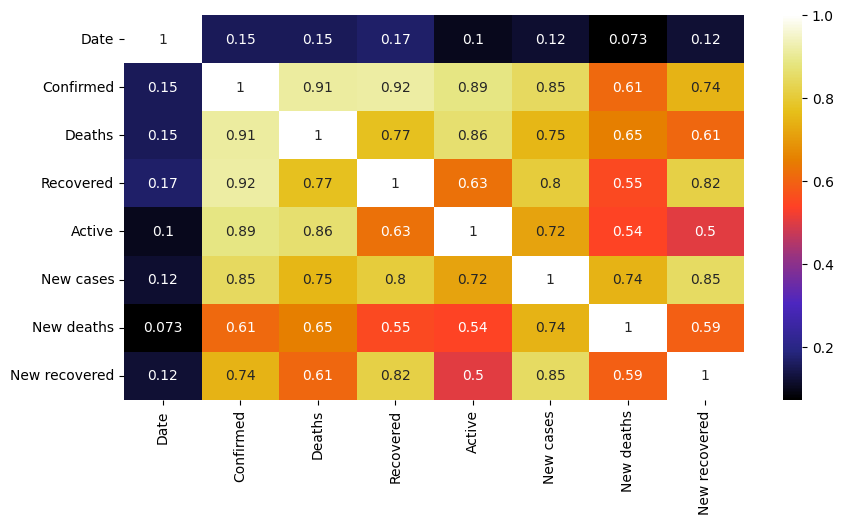

In [ ]:
plt.figure(figsize=(10,5))## Checking correlation
sns.heatmap(fg.corr(),annot=True,linecolor='pink',cmap='CMRmap')

###**Taking Country US for Predictive Modelling**

In [ ]:
US_dt=full_grouped[full_grouped['Country']=="US"]
US_dt

Date Country  Confirmed  Deaths  Recovered   Active  New cases  \
174   2020-01-22      US          1       0          0        1          0   
362   2020-01-23      US          1       0          0        1          0   
550   2020-01-24      US          2       0          0        2          1   
738   2020-01-25      US          2       0          0        2          0   
926   2020-01-26      US          5       0          0        5          3   
...          ...     ...        ...     ...        ...      ...        ...   
45106 2020-09-17      US    6674411  197633    2540334  3936444      44360   
45294 2020-09-18      US    6723933  198570    2556465  3968898      49522   
45482 2020-09-19      US    6768119  199282    2577446  3991391      44186   
45670 2020-09-20      US    6804814  199509    2590671  4014634      36695   
45858 2020-09-21      US    6856884  199865    2615949  4041070      52070   

       New deaths  New recovered  
174             0              0  
362             0              0  
550             0              0  
738             0              0  
926             0              0  
...           ...            ...  
45106         870          14761  
45294         937          16131  
45482         712          20981  
45670         227          13225  
45858         356          25278  

[244 rows x 9 columns]

In [ ]:
US_dt.set_index('Date', inplace=True)

In [ ]:
US_dt

Country  Confirmed  Deaths  Recovered   Active  New cases  \
Date                                                                   
2020-01-22      US          1       0          0        1          0   
2020-01-23      US          1       0          0        1          0   
2020-01-24      US          2       0          0        2          1   
2020-01-25      US          2       0          0        2          0   
2020-01-26      US          5       0          0        5          3   
...            ...        ...     ...        ...      ...        ...   
2020-09-17      US    6674411  197633    2540334  3936444      44360   
2020-09-18      US    6723933  198570    2556465  3968898      49522   
2020-09-19      US    6768119  199282    2577446  3991391      44186   
2020-09-20      US    6804814  199509    2590671  4014634      36695   
2020-09-21      US    6856884  199865    2615949  4041070      52070   

            New deaths  New recovered  
Date                                   
2020-01-22           0              0  
2020-01-23           0              0  
2020-01-24           0              0  
2020-01-25           0              0  
2020-01-26           0              0  
...                ...            ...  
2020-09-17         870          14761  
2020-09-18         937          16131  
2020-09-19         712          20981  
2020-09-20         227          13225  
2020-09-21         356          25278  

[244 rows x 8 columns]

In [ ]:
US = US_dt.iloc[:, [1, 2, 3]]
US

Confirmed  Deaths  Recovered
Date                                    
2020-01-22          1       0          0
2020-01-23          1       0          0
2020-01-24          2       0          0
2020-01-25          2       0          0
2020-01-26          5       0          0
...               ...     ...        ...
2020-09-17    6674411  197633    2540334
2020-09-18    6723933  198570    2556465
2020-09-19    6768119  199282    2577446
2020-09-20    6804814  199509    2590671
2020-09-21    6856884  199865    2615949

[244 rows x 3 columns]

##**splitting data into train and test**

In [ ]:
split_point=int(0.8*len(US))
print(split_point)

195


In [ ]:
train=US[0:split_point]
test=US[split_point:]

In [ ]:
train

Confirmed  Deaths  Recovered
Date                                    
2020-01-22          1       0          0
2020-01-23          1       0          0
2020-01-24          2       0          0
2020-01-25          2       0          0
2020-01-26          5       0          0
...               ...     ...        ...
2020-07-30    4495015  152791    1414155
2020-07-31    4562107  154034    1438160
2020-08-01    4620592  155149    1461885
2020-08-02    4668172  155552    1468689
2020-08-03    4713540  156082    1513446

[195 rows x 3 columns]

In [ ]:
test

Confirmed  Deaths  Recovered
Date                                    
2020-08-04    4771080  157460    1528979
2020-08-05    4823890  158836    1577851
2020-08-06    4883582  160089    1598624
2020-08-07    4941755  161331    1623870
2020-08-08    4997929  162408    1643118
2020-08-09    5044864  162919    1656864
2020-08-10    5094400  163446    1670755
2020-08-11    5141208  164510    1714960
2020-08-12    5197411  166015    1753760
2020-08-13    5248958  167085    1774648
2020-08-14    5313252  168423    1796326
2020-08-15    5361165  169457    1818527
2020-08-16    5403213  170028    1833067
2020-08-17    5438325  170474    1865580
2020-08-18    5483388  171799    1898159
2020-08-19    5529824  173152    1925049
2020-08-20    5573847  174231    1947035
2020-08-21    5622470  175336    1965056
2020-08-22    5667070  176318    1985484
2020-08-23    5701645  176768    1997761
2020-08-24    5739536  177210    2020774
2020-08-25    5777710  178449    2053699
2020-08-26    5821819  179674    2084465
2020-08-27    5867785  180785    2101326
2020-08-28    5913941  181756    2118367
2020-08-29    5961094  182714    2140614
2020-08-30    5996431  183024    2153939
2020-08-31    6030587  183597    2184825
2020-09-01    6073840  184664    2202663
2020-09-02    6113510  185720    2231757
2020-09-03    6150016  186790    2266957
2020-09-04    6200518  187755    2283454
2020-09-05    6244970  188538    2302187
2020-09-06    6276365  188941    2315995
2020-09-07    6300622  189208    2333551
2020-09-08    6327009  189653    2359111
2020-09-09    6360212  190859    2387479
2020-09-10    6396100  191766    2403511
2020-09-11    6443652  192979    2417878
2020-09-12    6485123  193693    2434658
2020-09-13    6520122  194071    2451406
2020-09-14    6553652  194493    2474570
2020-09-15    6592342  195781    2495127
2020-09-16    6630051  196763    2525573
2020-09-17    6674411  197633    2540334
2020-09-18    6723933  198570    2556465
2020-09-19    6768119  199282    2577446
2020-09-20    6804814  199509    2590671
2020-09-21    6856884  199865    2615949

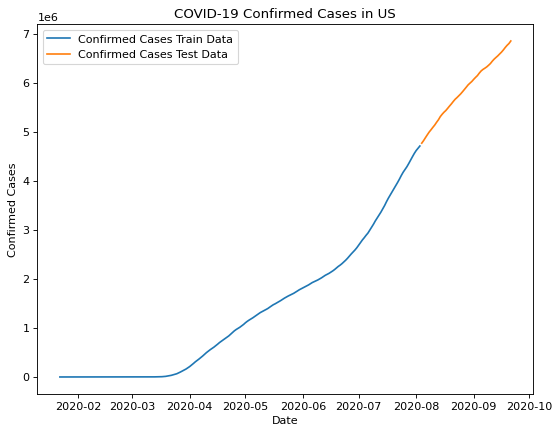

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(train.index, train['Confirmed'], label='Confirmed Cases Train Data')
plt.plot(test.index, test['Confirmed'], label='Confirmed Cases Test Data')
plt.legend()
plt.title("COVID-19 Confirmed Cases in US")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

In [ ]:
# Resample the data to weekly interval
resample=train.resample('7D')
weekly=resample.sum()
print(weekly)

            Confirmed   Deaths  Recovered
Date                                     
2020-01-22         21        0          0
2020-01-29         55        0          0
2020-02-05         78        0          9
2020-02-12         90        0         21
2020-02-19        101        0         32
2020-02-26        225       15         47
2020-03-04       2505      125         50
2020-03-11      20874      484         90
2020-03-18     195418     3619       1253
2020-03-25     866482    21082      18316
2020-04-01    2147841    77898     100626
2020-04-08    3667253   177132     233262
2020-04-15    5089278   284202     448054
2020-04-22    6533000   388960     691368
2020-04-29    7912526   483069    1171187
2020-05-06    9160041   568475    1475662
2020-05-13   10286375   639256    1853802
2020-05-20   11393530   698517    2434899
2020-05-27   12424660   746458    2981263
2020-06-03   13452628   789152    3506559
2020-06-10   14494013   825286    3899441
2020-06-17   15773857   856082    

In [ ]:
# Resample the data to monthly interval
resample=train.resample('1M')
monthly=resample.sum()
print(monthly)

            Confirmed   Deaths  Recovered
Date                                     
2020-01-31         38        0          0
2020-02-29        378        1         88
2020-03-31    1085433    25324      19730
2020-04-30   19553077  1057534    1747977
2020-05-31   45407574  2788799    8720047
2020-06-30   64933835  3572191   17434297
2020-07-31  111200861  4327115   34028380
2020-08-31   14002304   466783    4444020


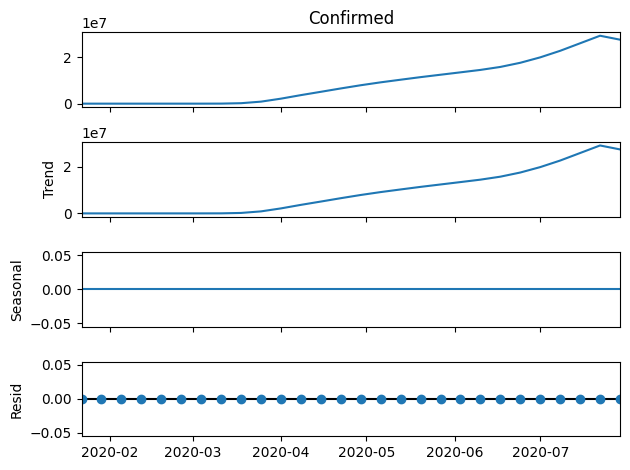

In [ ]:
# Decompose the weekly time-series to its components using statementslibrary.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weekly.Confirmed, period = 1 ,model="Multiplicative")
result.plot()
plt.show();

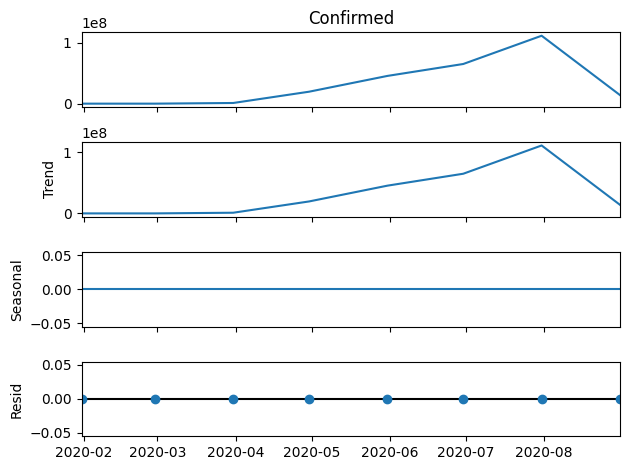

In [ ]:
# Decompose the monthly time-series to its components using statementslibrary.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly.Confirmed, period = 1 ,model="Multiplicative")
result.plot()
plt.show();

##**Checking the Stationarity**

<Axes: xlabel='Date', ylabel='Confirmed'>

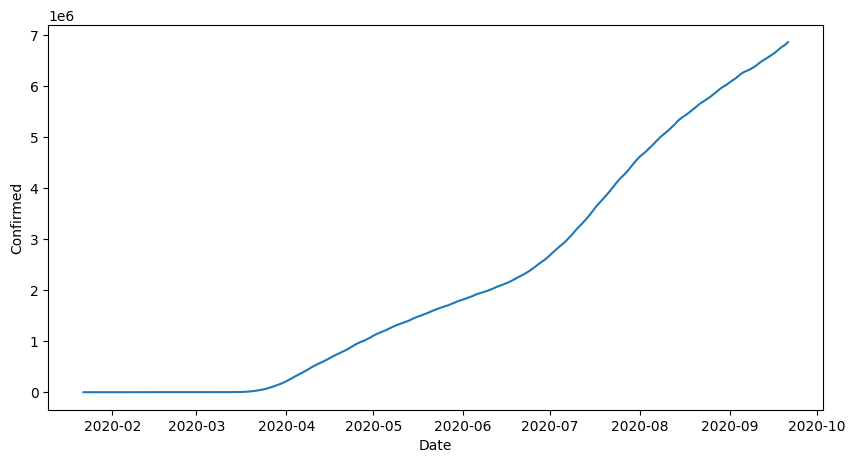

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=US,x=US.index,y=US.Confirmed)

In [ ]:
US['rollmean']=US.Confirmed.rolling(window=12).mean()

In [ ]:
US['rollStd']=US.Confirmed.rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Confirmed'>

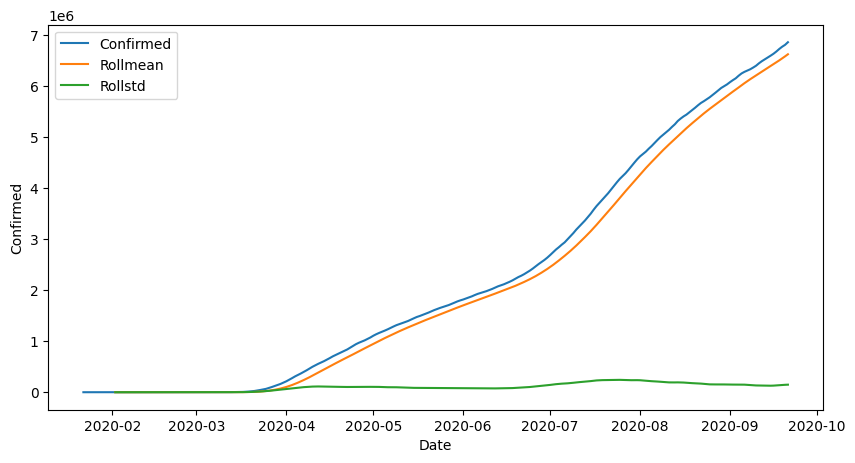

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=US,x=US.index,y=US.Confirmed,label='Confirmed')
sns.lineplot(data=US,x=US.index,y=US.rollmean,label='Rollmean')
sns.lineplot(data=US,x=US.index,y=US.rollStd,label='Rollstd')

it is not constant thus it is not stationary

##**ADF TEST**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf=adfuller(US['Confirmed'],autolag='AIC')

In [ ]:
adf

(2.101425405313591,
 0.9987910822263308,
 11,
 232,
 {'1%': -3.458854867412691,
  '5%': -2.8740800599399323,
  '10%': -2.573453223097503},
 4361.328220949097)

In [ ]:
adf[0:4]

(2.101425405313591, 0.9987910822263308, 11, 232)

In [ ]:
stats=pd.Series(adf[0:4],index=['Test Statistic','p-value',"#lags used",'number of observation used'])
stats

Test Statistic                  2.101425
p-value                         0.998791
#lags used                     11.000000
number of observation used    232.000000
dtype: float64

In [ ]:
for key,values in adf[4].items():
    print("criticality",key,":",values)

criticality 1% : -3.458854867412691
criticality 5% : -2.8740800599399323
criticality 10% : -2.573453223097503


* condition= test statistics< crtitical value
*p value<0.05
*Here 2.101425 > crtitical value
*Which contradicts the assumption
*Therfore it is non-stationary

In [ ]:
adf=adfuller(US_dif['Confirmed'],autolag='AIC')

stats=pd.Series(adf[0:4],index=['Test Statistic','p-value',"#lags used",'number of observation used'])
stats

Test Statistic                 -5.510205
p-value                         0.000002
#lags used                     15.000000
number of observation used    214.000000
dtype: float64

* Here, test statistics< crtitical value satisfys the condition.
* p value is <0.05
* Therefore we can say that the data is staionary.


##**MODEL CREATION**

##**MODEL 1 :- ARIMA-TESTING**

In [ ]:
#Finding the Partial Autocorrelation and Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

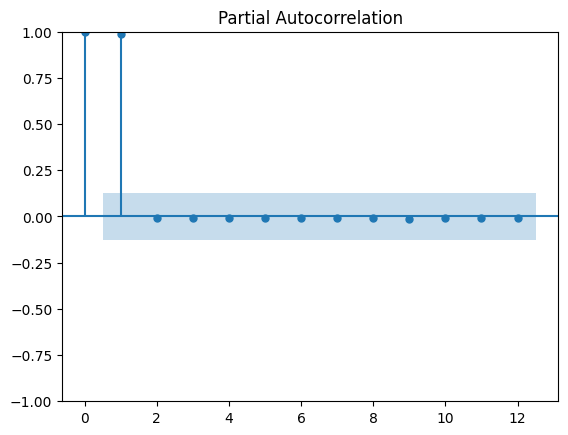

In [ ]:
plot_pacf(US['Confirmed'],lags=12);#Plotting the PACF

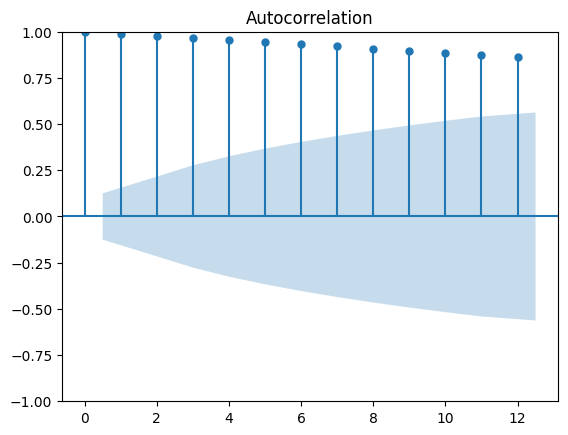

In [ ]:
plot_acf(US['Confirmed'],lags=12); #Plotting the ACF

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['Confirmed'], order=(1, 1, 2))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
# Generating the predictions using the fitted model
predict = result.predict(start=test.index[0], end=test.index[-1], dynamic=False)

In [ ]:
predict

2020-08-04    4.758556e+06
2020-08-05    4.803459e+06
2020-08-06    4.848263e+06
2020-08-07    4.892970e+06
2020-08-08    4.937578e+06
2020-08-09    4.982088e+06
2020-08-10    5.026500e+06
2020-08-11    5.070815e+06
2020-08-12    5.115032e+06
2020-08-13    5.159153e+06
2020-08-14    5.203176e+06
2020-08-15    5.247103e+06
2020-08-16    5.290933e+06
2020-08-17    5.334667e+06
2020-08-18    5.378305e+06
2020-08-19    5.421847e+06
2020-08-20    5.465294e+06
2020-08-21    5.508645e+06
2020-08-22    5.551900e+06
2020-08-23    5.595061e+06
2020-08-24    5.638127e+06
2020-08-25    5.681099e+06
2020-08-26    5.723976e+06
2020-08-27    5.766759e+06
2020-08-28    5.809448e+06
2020-08-29    5.852043e+06
2020-08-30    5.894544e+06
2020-08-31    5.936953e+06
2020-09-01    5.979268e+06
2020-09-02    6.021490e+06
2020-09-03    6.063619e+06
2020-09-04    6.105656e+06
2020-09-05    6.147601e+06
2020-09-06    6.189453e+06
2020-09-07    6.231214e+06
2020-09-08    6.272883e+06
2020-09-09    6.314460e+06
2

In [ ]:
test['arima_pred']=predict
test

Confirmed  Deaths  Recovered    arima_pred
Date                                                  
2020-08-04    4771080  157460    1528979  4.758556e+06
2020-08-05    4823890  158836    1577851  4.803459e+06
2020-08-06    4883582  160089    1598624  4.848263e+06
2020-08-07    4941755  161331    1623870  4.892970e+06
2020-08-08    4997929  162408    1643118  4.937578e+06
2020-08-09    5044864  162919    1656864  4.982088e+06
2020-08-10    5094400  163446    1670755  5.026500e+06
2020-08-11    5141208  164510    1714960  5.070815e+06
2020-08-12    5197411  166015    1753760  5.115032e+06
2020-08-13    5248958  167085    1774648  5.159153e+06
2020-08-14    5313252  168423    1796326  5.203176e+06
2020-08-15    5361165  169457    1818527  5.247103e+06
2020-08-16    5403213  170028    1833067  5.290933e+06
2020-08-17    5438325  170474    1865580  5.334667e+06
2020-08-18    5483388  171799    1898159  5.378305e+06
2020-08-19    5529824  173152    1925049  5.421847e+06
2020-08-20    5573847  174231    1947035  5.465294e+06
2020-08-21    5622470  175336    1965056  5.508645e+06
2020-08-22    5667070  176318    1985484  5.551900e+06
2020-08-23    5701645  176768    1997761  5.595061e+06
2020-08-24    5739536  177210    2020774  5.638127e+06
2020-08-25    5777710  178449    2053699  5.681099e+06
2020-08-26    5821819  179674    2084465  5.723976e+06
2020-08-27    5867785  180785    2101326  5.766759e+06
2020-08-28    5913941  181756    2118367  5.809448e+06
2020-08-29    5961094  182714    2140614  5.852043e+06
2020-08-30    5996431  183024    2153939  5.894544e+06
2020-08-31    6030587  183597    2184825  5.936953e+06
2020-09-01    6073840  184664    2202663  5.979268e+06
2020-09-02    6113510  185720    2231757  6.021490e+06
2020-09-03    6150016  186790    2266957  6.063619e+06
2020-09-04    6200518  187755    2283454  6.105656e+06
2020-09-05    6244970  188538    2302187  6.147601e+06
2020-09-06    6276365  188941    2315995  6.189453e+06
2020-09-07    6300622  189208    2333551  6.231214e+06
2020-09-08    6327009  189653    2359111  6.272883e+06
2020-09-09    6360212  190859    2387479  6.314460e+06
2020-09-10    6396100  191766    2403511  6.355946e+06
2020-09-11    6443652  192979    2417878  6.397341e+06
2020-09-12    6485123  193693    2434658  6.438645e+06
2020-09-13    6520122  194071    2451406  6.479858e+06
2020-09-14    6553652  194493    2474570  6.520981e+06
2020-09-15    6592342  195781    2495127  6.562013e+06
2020-09-16    6630051  196763    2525573  6.602956e+06
2020-09-17    6674411  197633    2540334  6.643808e+06
2020-09-18    6723933  198570    2556465  6.684571e+06
2020-09-19    6768119  199282    2577446  6.725244e+06
2020-09-20    6804814  199509    2590671  6.765827e+06
2020-09-21    6856884  199865    2615949  6.806322e+06

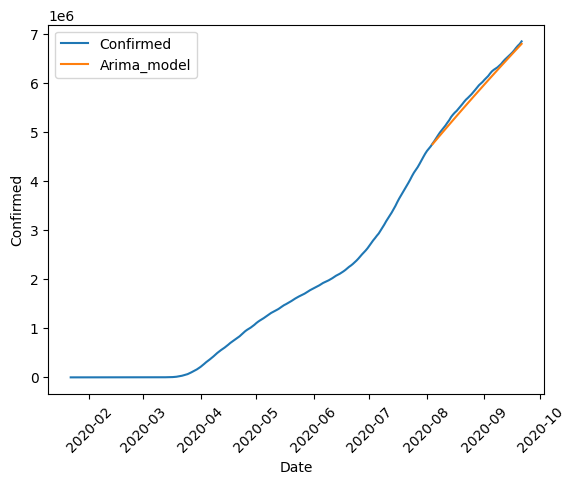

In [ ]:
sns.lineplot(data=US,x=US.index,y='Confirmed',label='Confirmed')
sns.lineplot(data=test,x=test.index,y='arima_pred',label='Arima_model')
plt.xticks(rotation=45)
# Show the plot
plt.show()

###**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import mean_squared_error

m=np.sqrt(mean_squared_error(test['Confirmed'],predict))
print("Mean Squared Error:", m)

Mean Squared Error: 80497.50112841472


The mean Squared error for Arima Model is 80498.43317249096

##**MODEL 2 :- SARIMAX**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
US

Confirmed  Deaths  Recovered      rollmean        rollStd
Date                                                                 
2020-01-22          1       0          0           NaN            NaN
2020-01-23          1       0          0           NaN            NaN
2020-01-24          2       0          0           NaN            NaN
2020-01-25          2       0          0           NaN            NaN
2020-01-26          5       0          0           NaN            NaN
...               ...     ...        ...           ...            ...
2020-09-17    6674411  197633    2540334  6.463305e+06  133623.329799
2020-09-18    6723933  198570    2556465  6.500602e+06  139053.410352
2020-09-19    6768119  199282    2577446  6.539560e+06  143354.147753
2020-09-20    6804814  199509    2590671  6.579378e+06  145293.122551
2020-09-21    6856884  199865    2615949  6.620767e+06  147903.636158

[244 rows x 5 columns]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX



#Model parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

try:
    # Define and fit the SARIMAX model
    model_sa = SARIMAX(train['Confirmed'], order=order, seasonal_order=seasonal_order)
    result_sa = model_sa.fit()
    prediction = result_sa.predict(start=test.index[0], end=test.index[-1])

except np.linalg.LinAlgError:
    print("Singular matrix encountered. Adjusting model parameters or data preprocessing may help.")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
prediction

2020-08-04    4.758681e+06
2020-08-05    4.804087e+06
2020-08-06    4.849990e+06
2020-08-07    4.896649e+06
2020-08-08    4.942651e+06
2020-08-09    4.989050e+06
2020-08-10    5.036112e+06
2020-08-11    5.081490e+06
2020-08-12    5.128095e+06
2020-08-13    5.174773e+06
2020-08-14    5.221783e+06
2020-08-15    5.269324e+06
2020-08-16    5.316538e+06
2020-08-17    5.364490e+06
2020-08-18    5.412169e+06
2020-08-19    5.459392e+06
2020-08-20    5.506170e+06
2020-08-21    5.554244e+06
2020-08-22    5.603403e+06
2020-08-23    5.650776e+06
2020-08-24    5.699162e+06
2020-08-25    5.746760e+06
2020-08-26    5.793578e+06
2020-08-27    5.840657e+06
2020-08-28    5.887420e+06
2020-08-29    5.934875e+06
2020-08-30    5.982134e+06
2020-08-31    6.029060e+06
2020-09-01    6.075520e+06
2020-09-02    6.123190e+06
2020-09-03    6.171904e+06
2020-09-04    6.218843e+06
2020-09-05    6.266817e+06
2020-09-06    6.314091e+06
2020-09-07    6.360697e+06
2020-09-08    6.407591e+06
2020-09-09    6.454169e+06
2

In [ ]:
test['sarima_pred']=prediction

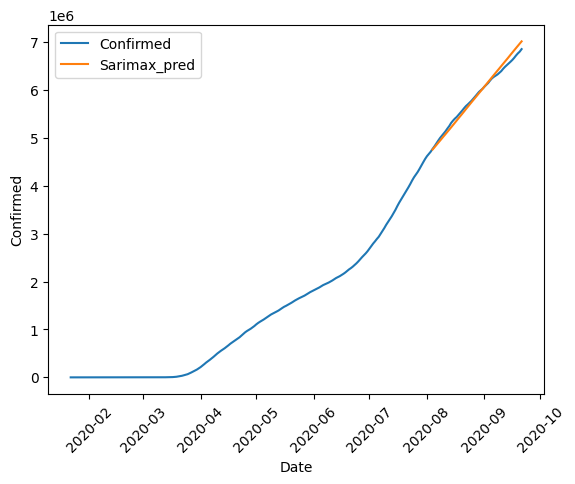

In [ ]:
sns.lineplot(data=US,x=US.index,y='Confirmed',label='Confirmed')
sns.lineplot(data=test,x=test.index,y='sarima_pred',label='Sarimax_pred')
plt.xticks(rotation=45)

# Show the plot
plt.show()

###**MODEL EVALUATION**

In [ ]:
np.sqrt(mean_squared_error(test['Confirmed'],prediction))

84569.38539075018

The mean squared error for SARIMAX Model is 84505.96639260383

##**MODEL 3 - AUTO REGRESSIVE**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
endog = US['Confirmed']

In [ ]:
lags = 121

In [ ]:
model = AutoReg(endog, lags=lags)
results = model.fit()

# Print the summary of the model
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  244
Model:                   AutoReg(121)   Log Likelihood                -860.616
Method:               Conditional MLE   S.D. of innovations            264.525
Date:                Mon, 29 Apr 2024   AIC                           1967.231
Time:                        16:07:47   BIC                           2313.130
Sample:                    05-22-2020   HQIC                          2107.734
                         - 09-21-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.262e+05   1.94e+04      6.502      0.000    8.82e+04    1.64e+05
Confirmed.L1       0.3677      0.044      8.294      0.000       0.281       0.455
Confirmed.L2      -0.1796      0.063

In [ ]:
fitted_values = results.fittedvalues

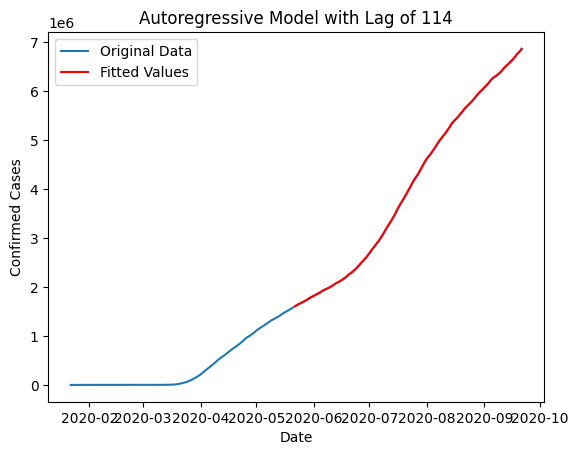

In [ ]:
plt.plot(endog.index, endog, label='Original Data')
plt.plot(endog.index[lags:], fitted_values, label='Fitted Values', color='red')  # Start from index lags
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Autoregressive Model with Lag of 114')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(endog[lags:], fitted_values)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 69973.53544668213


The mean squared error for AR Model is 69973.53544681788

##**MODEL 4 - HOLT-WINTER**

In [ ]:
constant=1
train['Conf_']=train['Confirmed']+constant
train

Confirmed  Deaths  Recovered    Conf_
Date                                             
2020-01-22          1       0          0        2
2020-01-23          1       0          0        2
2020-01-24          2       0          0        3
2020-01-25          2       0          0        3
2020-01-26          5       0          0        6
...               ...     ...        ...      ...
2020-07-30    4495015  152791    1414155  4495016
2020-07-31    4562107  154034    1438160  4562108
2020-08-01    4620592  155149    1461885  4620593
2020-08-02    4668172  155552    1468689  4668173
2020-08-03    4713540  156082    1513446  4713541

[195 rows x 4 columns]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.Conf_,trend="mul",seasonal="mul",seasonal_periods=2,damped=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
test_pred=hwmodel.forecast(49)
test_pred

2020-08-04    4.758850e+06
2020-08-05    4.804769e+06
2020-08-06    4.849714e+06
2020-08-07    4.895584e+06
2020-08-08    4.940453e+06
2020-08-09    4.986256e+06
2020-08-10    5.031033e+06
2020-08-11    5.076754e+06
2020-08-12    5.121422e+06
2020-08-13    5.167045e+06
2020-08-14    5.211588e+06
2020-08-15    5.257096e+06
2020-08-16    5.301500e+06
2020-08-17    5.346879e+06
2020-08-18    5.391128e+06
2020-08-19    5.436362e+06
2020-08-20    5.480442e+06
2020-08-21    5.525518e+06
2020-08-22    5.569414e+06
2020-08-23    5.614318e+06
2020-08-24    5.658018e+06
2020-08-25    5.702735e+06
2020-08-26    5.746226e+06
2020-08-27    5.790744e+06
2020-08-28    5.834012e+06
2020-08-29    5.878320e+06
2020-08-30    5.921353e+06
2020-08-31    5.965438e+06
2020-09-01    6.008225e+06
2020-09-02    6.052075e+06
2020-09-03    6.094605e+06
2020-09-04    6.138208e+06
2020-09-05    6.180470e+06
2020-09-06    6.223817e+06
2020-09-07    6.265800e+06
2020-09-08    6.308881e+06
2020-09-09    6.350576e+06
2

In [ ]:
test['test_pred']=test_pred

<Axes: xlabel='Date'>

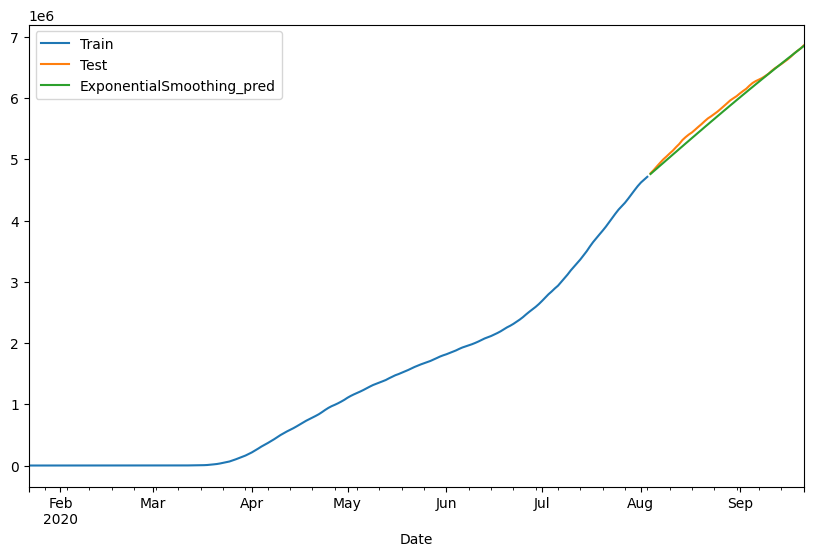

In [ ]:
train['Conf_'].plot(legend=True,label='Train',figsize=(10,6))
test['Confirmed'].plot(legend=True,label='Test')
test_pred.plot(legend=True,label='ExponentialSmoothing_pred')

###**MODEL EVALUATION**

In [ ]:
np.sqrt(mean_squared_error(test['Confirmed'],test_pred))

63064.9860994821

The mean squared error for HOLT WINTER is 63064.9860994821

####**MEAN SQUARED ERROR OF EVERY MODEL**

* Arima Model - 80498.43317249096
* SARIMAX Model - 84505.96639260383
* AR Model - 69973.53544681788
* HOLT WINTER - 63064.9860994821

While considering the 4 models, it is seen that HOLT WINTER is showing much more better performance than other models.So we are taking HOLT WINTER for future prediction.

##**FUTURE PREDICTION**

In [ ]:
# Generate a DataFrame with dates as index
f = pd.DataFrame(index=pd.date_range(start="2020-09-21", end="2020-12-21"))

# Check the first few rows of the DataFrame
print(f.head())

Empty DataFrame
Columns: []
Index: [2020-09-21 00:00:00, 2020-09-22 00:00:00, 2020-09-23 00:00:00, 2020-09-24 00:00:00, 2020-09-25 00:00:00]


In [ ]:
ft=hwmodel.predict(start=f.index[0],end=f.index[-1])

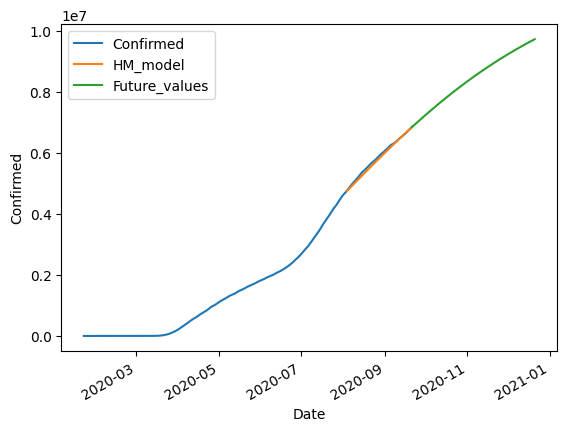

In [ ]:
sns.lineplot(data=US,x=US.index,y='Confirmed',label='Confirmed')
sns.lineplot(data=test,x=test.index,y='test_pred',label='HM_model')
ft.plot(label="Future_values")
plt.legend()

##**CONCLUSION**

* The JohnsHopkinsCovid19 project consist of 3 different dataset.They are * * * 'time_series_covid19_confirmed_global','time_series_covid19_deaths_global','time_series_covid19_recovered_global'.

* Since the 3 datasets have 248 columns in which first 4 columns are Province/State,Country/Region,Lat,Long and rest are the dates so I converted the wide dataset into long by using the melt function.

* After melting 3 datasets then i merge those datasets into one single dataset.

* While doing the EDA it is seen that US,Brazil and India are those countries mostly affected by the Covid19 virus.

* i have tried with 4 models for forcasting -ARIMA,SARIMAX,Exponential Smoothing and AR.

* After evaluating multiple time series models, it was determined that the HOLT WINTER model demonstrated the best performance based on Mean Squared Error (MSE).Thus I selected HOLT WINTER model for predicting confirm cases for the period of time "2020-09-21" to "2020-12-21".

##**SUGGESTION**
###**Based on our analysis on US these are our suggestions,**
- Improve testing capabilities:-Make testing more accessible and capable in order to quickly detect and isolate affected people.

- Improve Healthcare System :-Boost the healthcare system by making sure there are enough hospital beds, medical supplies, and equipment to handle any spikes in COVID-19 cases.

- Affordable medical support :- As most of these medical facilities are expensive most of the people stay back from these which can be threaten for their life.

- Proper Awareness programs on Rural Areas:- As the population in Rural areas are comparitively more proper awareness programs are necessary.

##**RISKS**

- Since there was 3 dataset it was difficult to merge them.

- Finding the best time series model was also a challenging one.